# Safari Challenge

In this challenge, you must train a convolutional neural network model that classifies images of animals you might find on a safari adventure.

## Explore the data

The training images you must use are in the **/safari/training** folder. Run the cell below to see an example of each image class, and note the shape of the images (which indicates the dimensions of the image and its color channels).

4 classes:
['elephant', 'giraffe', 'lion', 'zebra']


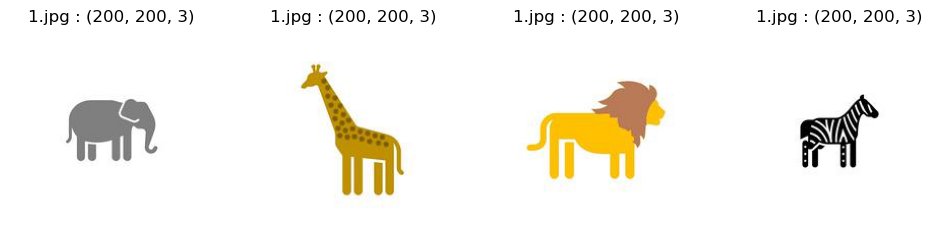

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# The images are in the data/shapes folder
data_path = 'safari/training'

# Get the class names
classes = os.listdir(data_path)
classes.sort()
print(len(classes), 'classes:')
print(classes)

# Show the first image in each folder
fig = plt.figure(figsize=(12, 12))
i = 0
for sub_dir in os.listdir(data_path):
    i+=1
    img_file = os.listdir(os.path.join(data_path,sub_dir))[0]
    img_path = os.path.join(data_path, sub_dir, img_file)
    img = mpimg.imread(img_path)
    img_shape = np.array(img).shape
    a=fig.add_subplot(1, len(classes),i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(img_file + ' : ' + str(img_shape))
plt.show()

Now that you've seen the images, use your preferred framework (PyTorch or TensorFlow) to train a CNN classifier for them. Your goal is to train a classifier with a validation accuracy of 95% or higher.

Add cells as needed to create your solution.

> **Note**: There is no single "correct" solution. Sample solutions are provided in [05 - Safari CNN Solution (PyTorch).ipynb](05%20-%20Safari%20CNN%20Solution%20(PyTorch).ipynb) and [05 - Safari CNN Solution (TensorFlow).ipynb](05%20-%20Safari%20CNN%20Solution%20(TensorFlow).ipynb).

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPool2D

EPOCHS = 10
BATCH_SIZE = 16

In [3]:
# Your Code to train a CNN model...

# Reading the data
images = []
labels = []
for sub_dir in os.listdir(data_path):
    img_dir = os.listdir(os.path.join(data_path,sub_dir))
    for img in img_dir:
        imgpath = os.path.join(data_path, sub_dir, img)
        images.append(mpimg.imread(imgpath))
        labels.append(sub_dir)
images = np.array(images)
labels = np.array(labels)

In [4]:
# Encoding the labels
le = LabelEncoder()
labels = le.fit_transform(labels)
mapping = dict(zip(le.classes_, range(len(le.classes_))))
mapping

{'elephant': 0, 'giraffe': 1, 'lion': 2, 'zebra': 3}

In [5]:
# Splitting the data
train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size=0.2, random_state=42)
print('Train size:', len(train_labels))
print('Test size:', len(val_labels))

Train size: 316
Test size: 80


In [6]:
# Standardize dataset.
mean = np.mean(train_images)
stddev = np.std(train_images)
train_images = (train_images - mean) / stddev
val_images = (val_images - mean) / stddev
print('mean: ', mean)
print('stddev: ', stddev)

# Change labels to one-hot.
train_labels = to_categorical(train_labels,
                              num_classes=4)
val_labels = to_categorical(val_labels,
                             num_classes=4)

mean:  234.4348592299578
stddev:  57.538564998265926


In [7]:
train_images[0].shape

(200, 200, 3)

In [8]:
# Model with two convolutional and one fully connected layer.
model = Sequential()
model.add(Conv2D(64, (5, 5), strides=(2,2),
                 activation='relu', padding='same',
                 input_shape=(200, 200, 3),
                 kernel_initializer='he_normal',
                 bias_initializer='zeros'))
model.add(Dropout(rate=0.2))

model.add(Conv2D(64, (3, 3), strides=(2,2),
                 activation='relu', padding='same',
                 kernel_initializer='he_normal',
                 bias_initializer='zeros'))
model.add(Flatten())
model.add(Dense(4, activation='softmax',
                kernel_initializer='glorot_uniform',
                bias_initializer='zeros'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics =['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 64)      4864      
                                                                 
 dropout (Dropout)           (None, 100, 100, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 160000)            0         
                                                                 
 dense (Dense)               (None, 4)                 640004    
                                                                 
Total params: 681,796
Trainable params: 681,796
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(
    train_images, train_labels, validation_data =
    (val_images, val_labels), epochs=EPOCHS,
    batch_size=BATCH_SIZE, verbose=2, shuffle=True)

Epoch 1/10
20/20 - 5s - loss: 4.6262 - accuracy: 0.7184 - val_loss: 0.2603 - val_accuracy: 0.9375 - 5s/epoch - 241ms/step
Epoch 2/10
20/20 - 4s - loss: 0.0265 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 1.0000 - 4s/epoch - 199ms/step
Epoch 3/10
20/20 - 4s - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000 - 4s/epoch - 176ms/step
Epoch 4/10
20/20 - 4s - loss: 3.4819e-04 - accuracy: 1.0000 - val_loss: 5.0879e-04 - val_accuracy: 1.0000 - 4s/epoch - 182ms/step
Epoch 5/10
20/20 - 3s - loss: 2.0818e-04 - accuracy: 1.0000 - val_loss: 3.4375e-04 - val_accuracy: 1.0000 - 3s/epoch - 173ms/step
Epoch 6/10
20/20 - 3s - loss: 1.1186e-04 - accuracy: 1.0000 - val_loss: 2.8137e-04 - val_accuracy: 1.0000 - 3s/epoch - 174ms/step
Epoch 7/10
20/20 - 3s - loss: 1.0407e-04 - accuracy: 1.0000 - val_loss: 2.5799e-04 - val_accuracy: 1.0000 - 3s/epoch - 174ms/step
Epoch 8/10
20/20 - 4s - loss: 1.1619e-04 - accuracy: 1.0000 - val_loss: 1.4276e-04 - val_accuracy: 1.0000 - 4s/epo

## Use the trained model

Now that we've trained your model, modify the following code as necessary to use it to predict the classes of the provided test images.

(1, 200, 200, 3)
1/1 [==============================] - 0s 21ms/step
(1, 200, 200, 3)
1/1 [==============================] - 0s 22ms/step
(1, 200, 200, 3)
1/1 [==============================] - 0s 23ms/step
(1, 200, 200, 3)
1/1 [==============================] - 0s 21ms/step


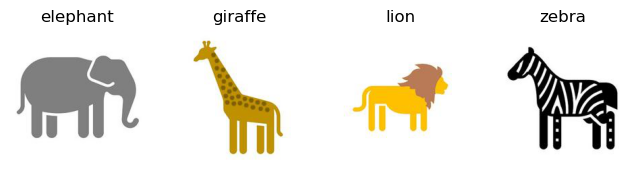

In [13]:
# Function to predict the class of an image
def predict_image(classifier, image):
    import numpy
    # Default value
    index = 0
    image = np.array([(image-mean)/stddev])
    print(image.shape)
    predict_proba = classifier.predict(image)
    index = np.argmax(predict_proba, axis=1)[0]
    # Return the predicted index
    return index

# The images are in the data/shapes folder
test_data_path = 'safari/test'

# Show the test images with predictions
fig = plt.figure(figsize=(8, 12))
i = 0
for img_file in os.listdir(test_data_path):
    i+=1
    img_path = os.path.join(test_data_path, img_file)
    img = mpimg.imread(img_path)
    # Get the image class prediction
    index = predict_image(model, np.array(img))
    a=fig.add_subplot(1, len(classes),i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(classes[index])
plt.show()

Hopefully, your model predicted all four of the image classes correctly!